### Depth Map from Stereo Images
Extract depth information from 2D images.

#### Goal
In this session,

* We will learn to create a depth map from stereo images.

#### Basics
마지막 세션에서는 에피 폴라 제약 및 기타 관련 용어와 같은 기본 개념을 보았습니다. 우리는 또한 동일한 장면의 두 개의 이미지가있는 경우 직관적 인 방식으로 심도있는 정보를 얻을 수 있음을 알았습니다. 아래는 직감을 증명하는 이미지와 몇 가지 간단한 수학 공식입니다. (이미지 제공 :

![](stereo_depth.jpg)

위 다이어그램에는 등가 삼각형이 포함되어 있습니다. 등가 방정식을 작성하면 다음과 같은 결과가 나타납니다:
\\(disparity = x - x' = \frac{Bf}{Z}\\)

\\(x\\) 및 \\(x'\\)는 장면 점 3D에 대응하는 이미지 평면 내의 점들과 그들의 카메라 중심 간의 거리이다. \\(B\\)는 우리가 알고있는 두 카메라 사이의 거리이고, f는 이미 알려진 카메라의 초점 거리입니다. 간단히 말해서, 위의 방정식은 장면의 점 깊이가 해당 이미지 점과 카메라 중심점의 거리의 차이에 반비례한다고 말합니다. 따라서이 정보를 사용하여 이미지의 모든 픽셀의 깊이를 도출 할 수 있습니다.

따라서 두 이미지간에 일치하는 항목을 찾습니다. 에필라인 제약이 어떻게 이 작업을 보다 빠르고 정확하게 수행하는지 보았습니다. 일단 그것이 일치를 발견하면, 그것은 불일치를 찾습니다. 우리가 OpenCV로 어떻게 할 수 있는지 보자.

#### Code
Below code snippet shows a simple procedure to create a disparity map.

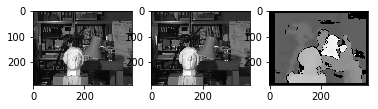

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

imgL = cv.imread('../data/tsukuba_l.png',0)
imgR = cv.imread('../data/tsukuba_r.png',0)

stereo    = cv.StereoBM_create(numDisparities = 16, blockSize = 15)
disparity = stereo.compute(imgL,imgR)

plt.subplot(131), plt.imshow(imgL,'gray')
plt.subplot(132), plt.imshow(imgR,'gray')
plt.subplot(133), plt.imshow(disparity,'gray')
plt.show()

위 이미지는 원래 이미지 (왼쪽)와 불일치 맵 (오른쪽)을 포함합니다. 보시다시피 결과는 높은 수준의 노이즈로 오염되었습니다. numDisparities 및 blockSize의 값을 조정하면 더 나은 결과를 얻을 수 있습니다.

StereoBM에 익숙해지면 몇 가지 매개 변수가 있습니다. 매개 변수를 미세 조정해야 더 좋고 매끄러운 결과를 얻을 수 있습니다. 매개 변수 :

* texture_threshold : 신뢰할 수있는 일치를 위해 텍스처가 부족한 영역을 필터링합니다.
* 얼룩의 범위와 크기 : 블록 기반의 얼룩이 찍힌 부분은 오브젝트의 경계 근처에 "얼룩 (speckles)"을 생성합니다. 일치하는 창은 한쪽의 전경과 다른 쪽의 배경을 잡습니다. 이 장면에서 matcher는 테이블에 투영 된 텍스처에서 작은 가짜 일치를 찾는 것으로 나타납니다. 이러한 아티팩트를 없애기 위해 우리는 speckle_size 및 speckle_range 매개 변수로 제어되는 스펙 클 필터로 불일치 이미지를 사후 처리합니다. speckle_size는 불일치 블롭이 "스펙 클 (speckle)"로 해독되는 픽셀 수입니다. speckle_range는 값 불일치가 얼마나 가까운 값을 동일한 얼룩의 일부로 간주해야 하는지를 제어합니다.
* 불일치 수 : 창을 슬라이드 할 픽셀 수입니다. 크기가 클수록 가시 깊이의 범위는 더 커지지 만 더 많은 계산이 필요합니다.
* min_disparity : 검색을 시작할 왼쪽 픽셀의 x 위치로부터의 오프셋.
* uniqueness_ratio : 또 다른 사후 필터링 단계. 최상의 매칭 불일치가 검색 범위 내의 다른 모든 불일치보다 충분히 우수하지 않은 경우, 픽셀은 필터링된다. texture_threshold와 스페 클 필터링이 여전히 가짜 일치를 통과시키는 경우이 조정을 시도 할 수 있습니다.
* prefilter_size 및 prefilter_cap : 사전 필터링 단계로 이미지 밝기를 표준화하고 블록 일치를 준비하기 위해 텍스처를 향상시킵니다. 일반적으로 조정할 필요는 없습니다.

#### Additional Resources
[Ros stereo img 위키 페이지 처리 중](http://wiki.ros.org/stereo_image_proc/Tutorials/ChoosingGoodStereoParameters)

#### Exercises
OpenCV 샘플에는 디스 패리티 맵 생성 및 3D 재구성 예제가 포함되어 있습니다. OpenCV-Python 샘플에서 stereo_match.py를 확인하십시오.